In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (14,9)
%matplotlib inline


In [95]:
data = pd.read_csv('/content/sales_data_with_discounts.csv')
data.head(10)

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
5,01-04-2021,Thursday,M06,C,3,Mobiles,RealU,RU-9,8100,24300,16.996489,4130.146805,20169.853195
6,01-04-2021,Thursday,M07,C,3,Mobiles,Sumsang,S-20,49100,147300,9.228812,13594.039719,133705.960281
7,01-04-2021,Thursday,M08,C,2,Mobiles,Sumsang,S-21,54100,108200,5.553719,6009.124321,102190.875679
8,01-04-2021,Thursday,M09,C,2,Mobiles,Orange,O-10,55100,110200,7.410104,8165.935144,102034.064856
9,01-04-2021,Thursday,M10,C,3,Mobiles,Orange,O-11,60100,180300,9.928444,17900.983733,162399.016267


In [96]:
data.shape

(450, 13)

In [97]:
data.dtypes

,0
Date,object
Day,object
SKU,object
City,object
Volume,int64
BU,object
Brand,object
Model,object
Avg Price,int64
Total Sales Value,int64


In [98]:
data.columns

Index(['Date', 'Day', 'SKU', 'City', 'Volume', 'BU', 'Brand', 'Model',
       'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

In [99]:
data.describe()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


In [100]:
data['Avg Price'].mean()

np.float64(10453.433333333332)

In [101]:
numeric_cols = data.select_dtypes(include=['number']).columns
print(numeric_cols)

Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')


In [102]:
columns = ['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
           'Discount Amount', 'Net Sales Value']

mean_values = data[columns].mean()

print(mean_values)

Volume                   5.066667
Avg Price            10453.433333
Total Sales Value    33812.835556
Discount Rate (%)       15.155242
Discount Amount       3346.499424
Net Sales Value      30466.336131
dtype: float64


In [103]:
columns = ['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
           'Discount Amount', 'Net Sales Value']

mean_values = data[columns].median()

print(mean_values)

Volume                  4.000000
Avg Price            1450.000000
Total Sales Value    5700.000000
Discount Rate (%)      16.577766
Discount Amount       988.933733
Net Sales Value      4677.788059
dtype: float64


In [104]:
for column in data.columns:
    Mode = data[column].mode()[0]
    print(f"Columns: {column}, Mode : {Mode}")

Columns: Date, Mode : 01-04-2021
Columns: Day, Mode : Thursday
Columns: SKU, Mode : F01
Columns: City, Mode : C
Columns: Volume, Mode : 3
Columns: BU, Mode : FMCG
Columns: Brand, Mode : Jeera
Columns: Model, Mode : Babaji Cream
Columns: Avg Price, Mode : 400
Columns: Total Sales Value, Mode : 24300
Columns: Discount Rate (%), Mode : 5.007822189204133
Columns: Discount Amount, Mode : 69.17794228822787
Columns: Net Sales Value, Mode : 326.97480055470817


**brief interpretation of statistics.**

1) There are no missing (null) values in the numerical columns.

2) Most of the data points are concentrated around the following average values:

    Volume is centered near 5.066

    Average Price is around ₹10,453.43

    Total Sales Value mostly lies close to ₹33,812.83

    Discount Rate tends to be near 15.15%

    Discount Amount is approximately ₹3,346.49

    Net Sales Value is roughly ₹30,466.34

3) Standard Deviation (SD) shows how spread out the values are.

    Lower SD indicates values are closely packed (low variability).

    Higher SD indicates that data is more spread out (high variability).

4) Minimum and Maximum values help us understand the lowest and highest data points within each numerical column.

5) The 25th, 50th, and 75th percentiles give insights into data distribution:

These are known as quantiles or percentile values.

    In the Volume column:

    25% of entries are below 3 (also called Q1 or first quartile).

    50% of entries are below 4 (this is the median or Q2).

    75% of entries are below 6 (known as Q3 or third quartile).

6) To detect outliers, we usually compare values like mean, Q1, Q3, and max.

    But if there are thousands of columns, manually checking isn't practical.

    So, we use visual tools like boxplots to identify outliers efficiently.

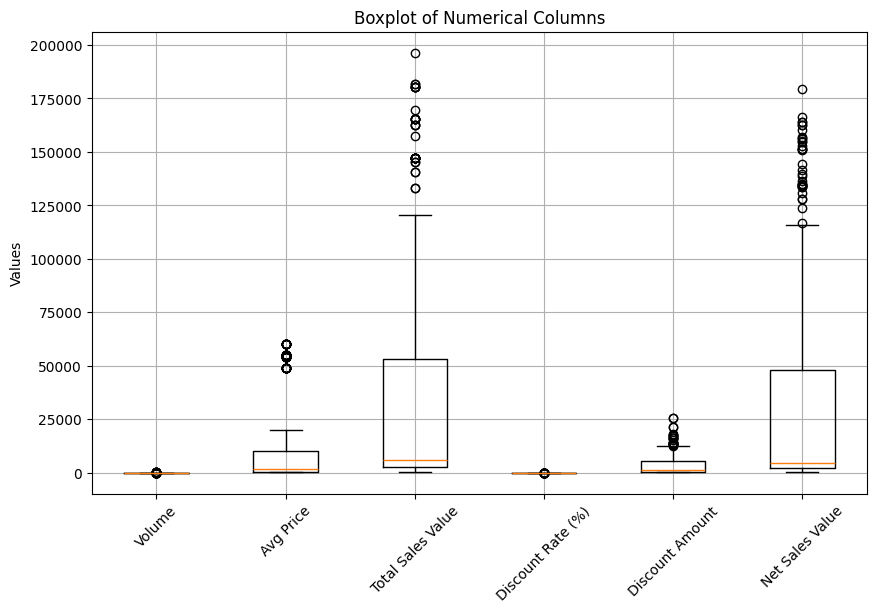

In [105]:
plt.figure(figsize=(10, 6))
plt.boxplot(data[columns].values, labels=columns)
plt.title('Boxplot of Numerical Columns')
plt.xticks(rotation=45)
plt.ylabel('Values')
plt.grid(True)
plt.show()


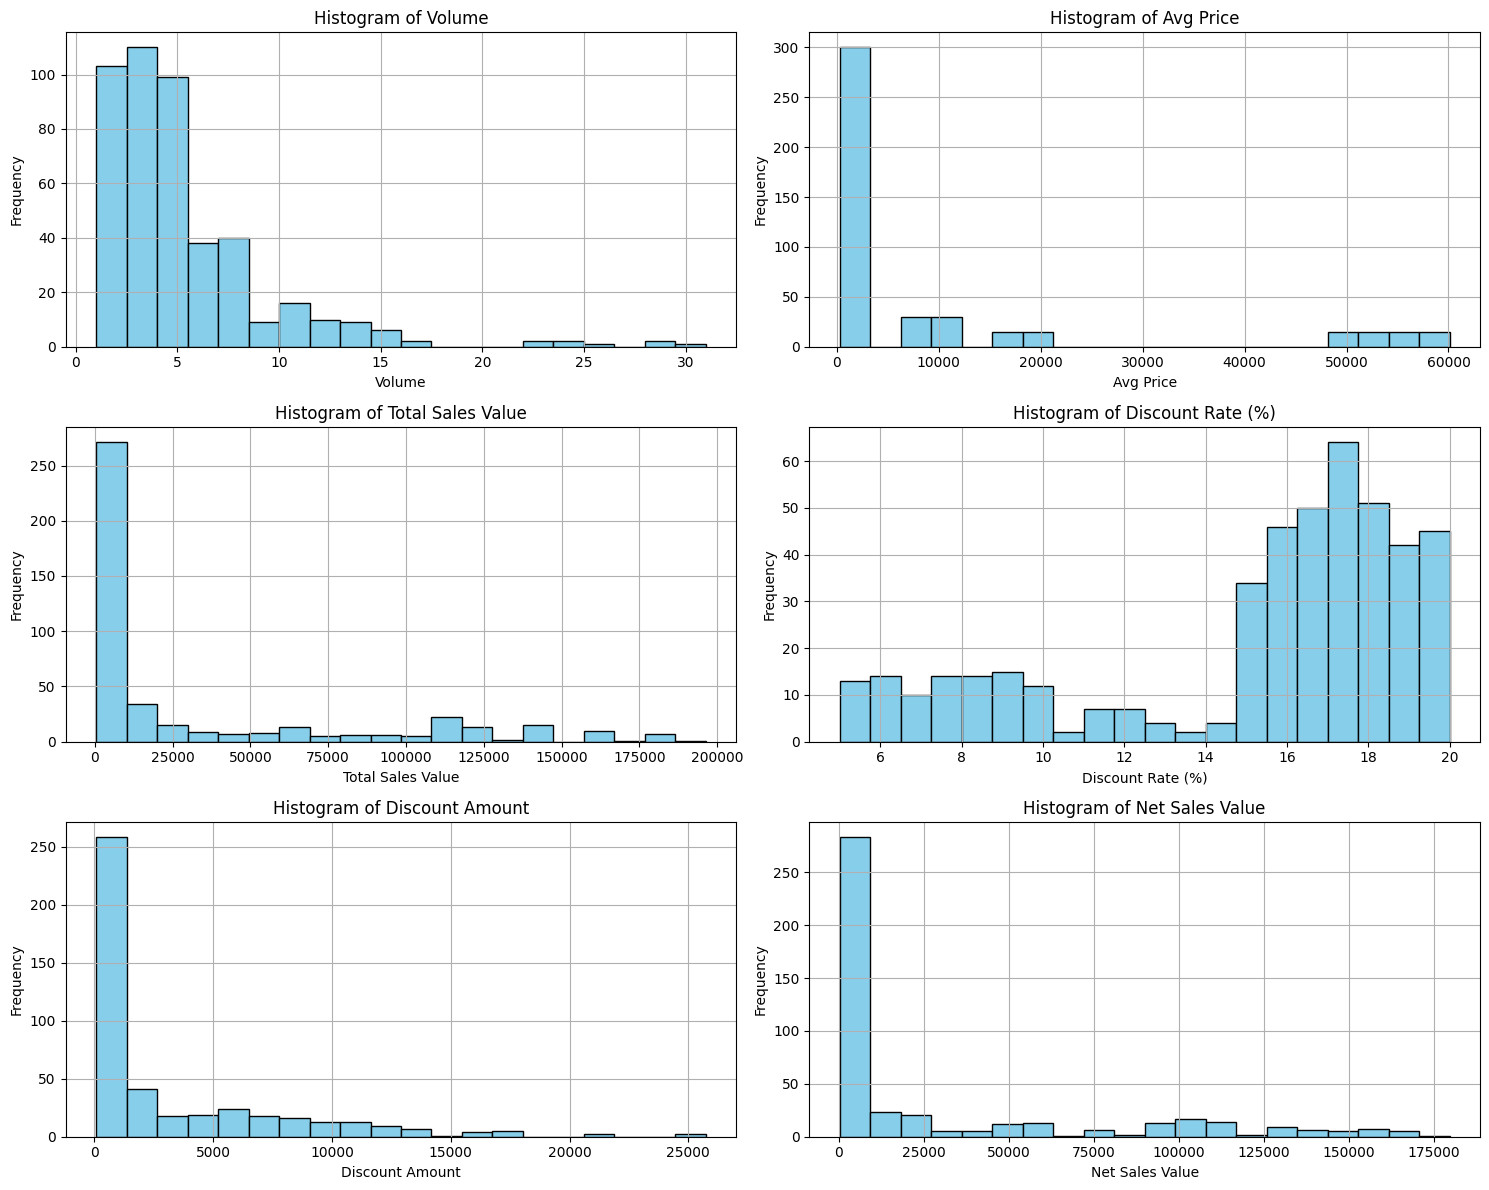

In [106]:
columns = ['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
           'Discount Amount', 'Net Sales Value']

plt.figure(figsize=(15, 12))

for i, col in enumerate(columns):
    plt.subplot(3, 2, i + 1)
    plt.hist(data[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()

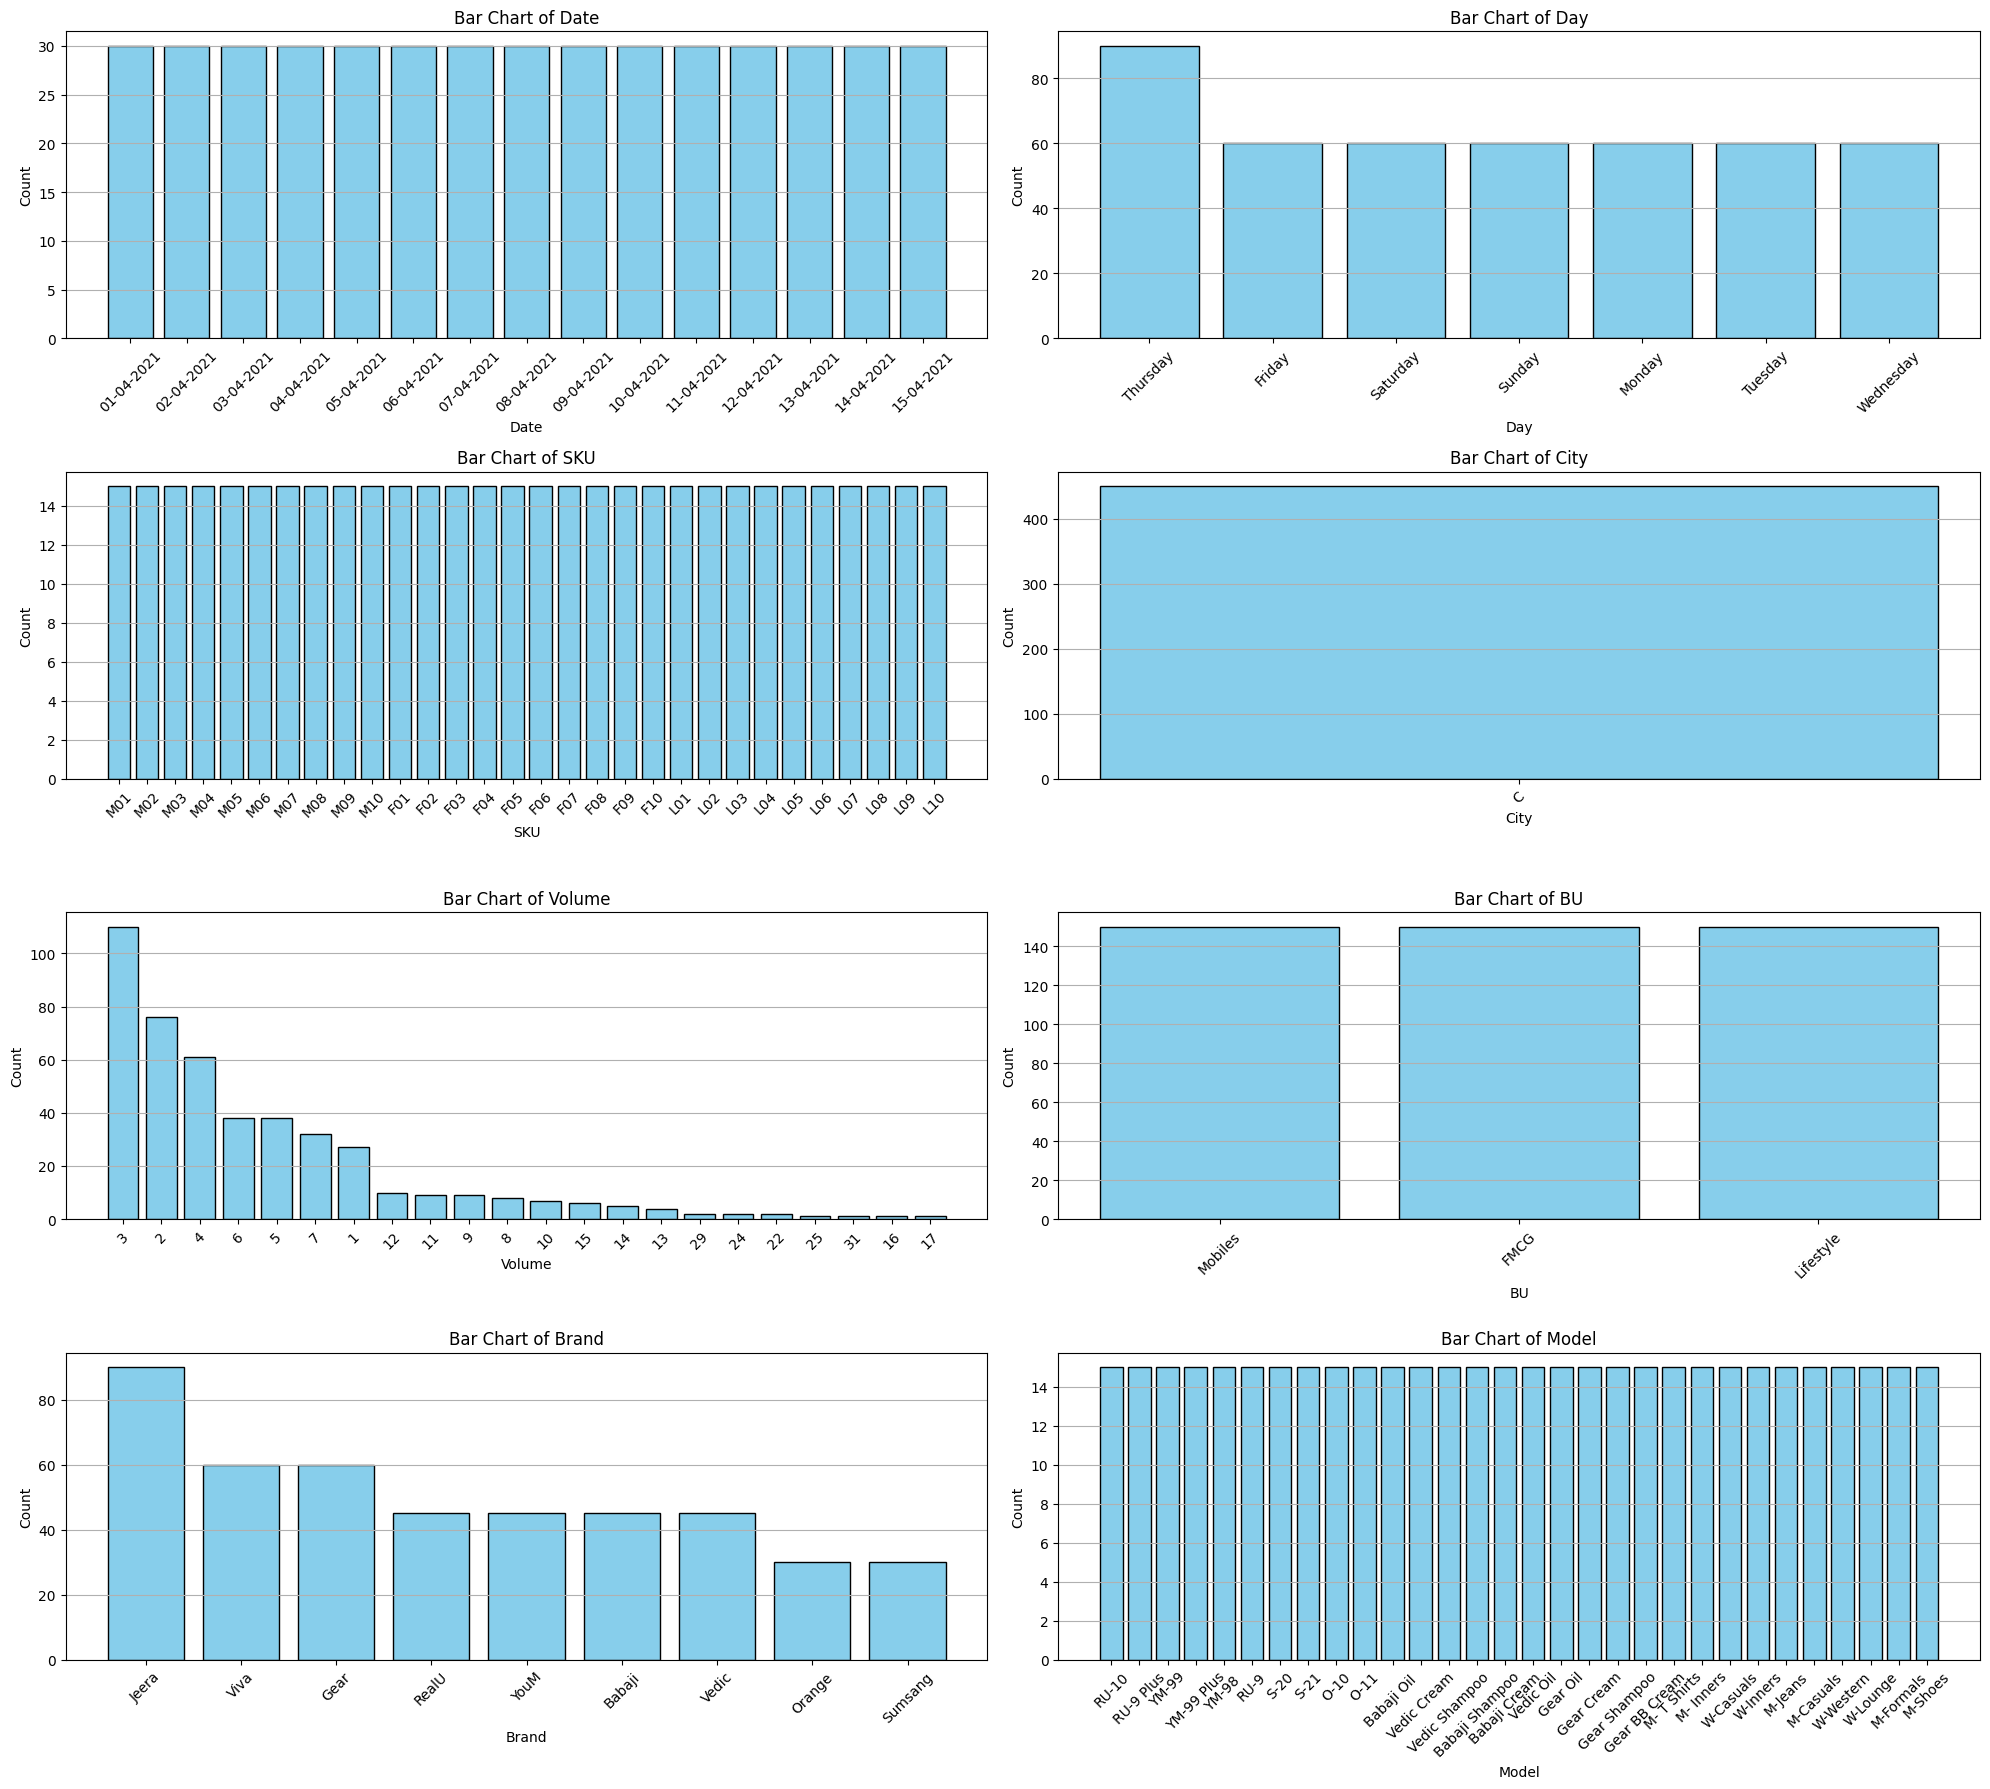

In [107]:
new_column = ['Date', 'Day', 'SKU', 'City', 'Volume', 'BU', 'Brand', 'Model']

plt.figure(figsize=(20, 18))

for i, col in enumerate(new_column):
    plt.subplot(4, 2, i + 1)
    value_counts = data[col].value_counts()

    plt.bar(value_counts.index.astype(str), value_counts.values, color='skyblue', edgecolor='black')
    plt.title(f'Bar Chart of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(axis='y')

plt.tight_layout()
plt.show()


In [108]:
data.dtypes

,0
Date,object
Day,object
SKU,object
City,object
Volume,int64
BU,object
Brand,object
Model,object
Avg Price,int64
Total Sales Value,int64


In [109]:
columns = data.select_dtypes(include=['int64','float64'])
columns

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,15,12100,181500,11.654820,21153.498820,160346.501180
1,10,10100,101000,11.560498,11676.102961,89323.897039
2,7,16100,112700,9.456886,10657.910157,102042.089843
3,6,20100,120600,6.935385,8364.074702,112235.925298
4,3,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...
445,2,1300,2600,15.475687,402.367873,2197.632127
446,6,2600,15600,17.057027,2660.896242,12939.103758
447,2,1600,3200,18.965550,606.897606,2593.102394
448,3,1900,5700,16.793014,957.201826,4742.798174


In [110]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
data[columns.columns] = scale.fit_transform(columns)
data

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,2.350029,Mobiles,RealU,RU-10,0.091173,2.925721,-0.830289,3.952816,2.804756
1,01-04-2021,Thursday,M02,C,1.167129,Mobiles,RealU,RU-9 Plus,-0.019570,1.330995,-0.852661,1.849014,1.271026
2,01-04-2021,Thursday,M03,C,0.457388,Mobiles,YouM,YM-99,0.312659,1.562775,-1.351631,1.622995,1.545675
3,01-04-2021,Thursday,M04,C,0.220808,Mobiles,YouM,YM-99 Plus,0.534146,1.719276,-1.949723,1.113807,1.765810
4,01-04-2021,Thursday,M05,C,-0.488932,Mobiles,YouM,YM-98,-0.130313,-0.188452,0.673739,0.227852,-0.227595
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,-0.725512,Lifestyle,Jeera,M-Casuals,-0.506840,-0.618334,0.076009,-0.653541,-0.610461
446,15-04-2021,Thursday,L07,C,0.220808,Lifestyle,Viva,W-Western,-0.434857,-0.360801,0.451097,-0.152191,-0.378500
447,15-04-2021,Thursday,L08,C,-0.725512,Lifestyle,Viva,W-Lounge,-0.490229,-0.606448,0.903793,-0.608140,-0.601921
448,15-04-2021,Thursday,L09,C,-0.488932,Lifestyle,Jeera,M-Formals,-0.473617,-0.556923,0.388474,-0.530379,-0.555499


In [111]:
data.drop(columns=['Date','Day'],inplace=True)
data

,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,M01,C,2.350029,Mobiles,RealU,RU-10,0.091173,2.925721,-0.830289,3.952816,2.804756
1,M02,C,1.167129,Mobiles,RealU,RU-9 Plus,-0.019570,1.330995,-0.852661,1.849014,1.271026
2,M03,C,0.457388,Mobiles,YouM,YM-99,0.312659,1.562775,-1.351631,1.622995,1.545675
3,M04,C,0.220808,Mobiles,YouM,YM-99 Plus,0.534146,1.719276,-1.949723,1.113807,1.765810
4,M05,C,-0.488932,Mobiles,YouM,YM-98,-0.130313,-0.188452,0.673739,0.227852,-0.227595
...,...,...,...,...,...,...,...,...,...,...,...
445,L06,C,-0.725512,Lifestyle,Jeera,M-Casuals,-0.506840,-0.618334,0.076009,-0.653541,-0.610461
446,L07,C,0.220808,Lifestyle,Viva,W-Western,-0.434857,-0.360801,0.451097,-0.152191,-0.378500
447,L08,C,-0.725512,Lifestyle,Viva,W-Lounge,-0.490229,-0.606448,0.903793,-0.608140,-0.601921
448,L09,C,-0.488932,Lifestyle,Jeera,M-Formals,-0.473617,-0.556923,0.388474,-0.530379,-0.555499


In [112]:
data = pd.concat([data.drop(data.select_dtypes(object).columns, axis=1),pd.get_dummies(data.select_dtypes(object))], axis=1)


In [113]:
data

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,SKU_F01,SKU_F02,SKU_F03,SKU_F04,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,2.350029,0.091173,2.925721,-0.830289,3.952816,2.804756,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1.167129,-0.019570,1.330995,-0.852661,1.849014,1.271026,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0.457388,0.312659,1.562775,-1.351631,1.622995,1.545675,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,0.220808,0.534146,1.719276,-1.949723,1.113807,1.765810,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,-0.488932,-0.130313,-0.188452,0.673739,0.227852,-0.227595,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,-0.725512,-0.506840,-0.618334,0.076009,-0.653541,-0.610461,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
446,0.220808,-0.434857,-0.360801,0.451097,-0.152191,-0.378500,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
447,-0.725512,-0.490229,-0.606448,0.903793,-0.608140,-0.601921,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
448,-0.488932,-0.473617,-0.556923,0.388474,-0.530379,-0.555499,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [114]:
data

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,SKU_F01,SKU_F02,SKU_F03,SKU_F04,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,2.350029,0.091173,2.925721,-0.830289,3.952816,2.804756,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1.167129,-0.019570,1.330995,-0.852661,1.849014,1.271026,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0.457388,0.312659,1.562775,-1.351631,1.622995,1.545675,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,0.220808,0.534146,1.719276,-1.949723,1.113807,1.765810,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,-0.488932,-0.130313,-0.188452,0.673739,0.227852,-0.227595,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,-0.725512,-0.506840,-0.618334,0.076009,-0.653541,-0.610461,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
446,0.220808,-0.434857,-0.360801,0.451097,-0.152191,-0.378500,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
447,-0.725512,-0.490229,-0.606448,0.903793,-0.608140,-0.601921,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
448,-0.488932,-0.473617,-0.556923,0.388474,-0.530379,-0.555499,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
